In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from warnings import filterwarnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 100

In [4]:
df.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [5]:
df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [6]:
df.shape

(26707, 34)

In [7]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [8]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [10]:
df["h1n1_worry"]=df["h1n1_worry"].replace(to_replace="0",value=np.nan)
df["h1n1_worry"]=df["h1n1_worry"].astype(float)

In [11]:

mean=df["h1n1_worry"].mean()
mean 

1.6184858162690212

In [12]:
df["h1n1_worry"].replace(np.nan,mean,inplace=True)

In [13]:
df["h1n1_awareness"]=df["h1n1_awareness"].replace(to_replace="0",value=np.nan)
df["h1n1_awareness"]=df["h1n1_awareness"].astype(float)

In [14]:
mean=df["h1n1_awareness"].mean()
mean 

1.2625324357865444

In [15]:
df["h1n1_awareness"].replace(np.nan,mean,inplace=True)

In [16]:
df["contact_avoidance"]=df["contact_avoidance"].replace(to_replace="0",value=np.nan)
df["contact_avoidance"]=df["contact_avoidance"].astype(float)

In [17]:
mean=df["contact_avoidance"].mean()
mean 

0.7256122872561229

In [18]:
df["contact_avoidance"].replace(np.nan,mean,inplace=True)

In [19]:
df["antiviral_medication"]=df["antiviral_medication"].replace(to_replace="0",value=np.nan)
df["antiviral_medication"]=df["antiviral_medication"].astype(float)

In [20]:
mean=df["antiviral_medication"].mean()
mean 

0.048843670220753865

In [21]:
df["antiviral_medication"].replace(np.nan,mean,inplace=True)

In [22]:
df["bought_face_mask"]=df["bought_face_mask"].replace(to_replace="0",value=np.nan)
df["bought_face_mask"]=df["bought_face_mask"].astype(float)

In [23]:
mean=df["bought_face_mask"].mean()
mean 

0.06898231414868106

In [24]:
df["bought_face_mask"].replace(np.nan,mean,inplace=True)

In [25]:
df["wash_hands_frequently"]=df["wash_hands_frequently"].replace(to_replace="0",value=np.nan)
df["wash_hands_frequently"]=df["wash_hands_frequently"].astype(float)

In [26]:
mean=df["wash_hands_frequently"].mean()
mean 

0.825614100881305

In [27]:
df["wash_hands_frequently"].replace(np.nan,mean,inplace=True)

In [28]:
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].replace(to_replace="0",value=np.nan)
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].astype(float)

In [29]:
mean=df["avoid_large_gatherings"].mean()
mean 

0.3586401202103681

In [30]:
df["avoid_large_gatherings"].replace(np.nan,mean,inplace=True)

In [31]:
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].replace(to_replace="0",value=np.nan)
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].astype(float)

In [32]:
mean=df["reduced_outside_home_cont"].mean()
mean 

0.33731455399061033

In [33]:
df["reduced_outside_home_cont"].replace(np.nan,mean,inplace=True)

In [34]:
df["avoid_touch_face"]=df["avoid_touch_face"].replace(to_replace="0",value=np.nan)
df["avoid_touch_face"]=df["avoid_touch_face"].astype(float)

In [35]:
mean=df["avoid_touch_face"].mean()
mean 

0.6772640054178111

In [36]:
df["avoid_touch_face"].replace(np.nan,mean,inplace=True)

In [37]:
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].replace(to_replace="0",value=np.nan)
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].astype(float)

In [38]:
mean=df["dr_recc_h1n1_vacc"].mean()
mean 

0.2203120544262028

In [39]:
df["dr_recc_h1n1_vacc"].replace(np.nan,mean,inplace=True)

In [40]:
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].replace(to_replace="0",value=np.nan)
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].astype(float)

In [41]:
mean=df["dr_recc_seasonal_vacc"].mean()
mean 

0.32973479447590337

In [42]:
df["dr_recc_seasonal_vacc"].replace(np.nan,mean,inplace=True)

In [43]:
df["chronic_medic_condition"]=df["chronic_medic_condition"].replace(to_replace="0",value=np.nan)
df["chronic_medic_condition"]=df["chronic_medic_condition"].astype(float)

In [44]:
mean=df["chronic_medic_condition"].mean()
mean 

0.28326080198943115

In [45]:
df["chronic_medic_condition"].replace(np.nan,mean,inplace=True)

In [46]:
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].replace(to_replace="0",value=np.nan)
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].astype(float)

In [47]:
mean=df["cont_child_undr_6_mnths"].mean()
mean 

0.0825897168462935

In [48]:
df["cont_child_undr_6_mnths"].replace(np.nan,mean,inplace=True)

In [49]:
df["is_health_worker"]=df["is_health_worker"].replace(to_replace="0",value=np.nan)

df["is_health_worker"]=df["is_health_worker"].astype(float)

In [50]:
mean=df["is_health_worker"].mean()
mean 

0.111917538509053

In [51]:
df["is_health_worker"].replace(np.nan,mean,inplace=True)

In [52]:
df["has_health_insur"]=df["has_health_insur"].replace(to_replace="0",value=np.nan)

df["has_health_insur"]=df["has_health_insur"].astype(float)

In [53]:
mean=df["has_health_insur"].mean()
mean 

0.8797200859142243

In [54]:
df["has_health_insur"].replace(np.nan,mean,inplace=True)

In [55]:
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].replace(to_replace="0",value=np.nan)

df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].astype(float)

In [56]:
mean=df["is_h1n1_vacc_effective"].mean()
mean 

3.85062319501444

In [57]:
df["is_h1n1_vacc_effective"].replace(np.nan,mean,inplace=True)              

In [58]:
df["is_h1n1_risky"]=df["is_h1n1_risky"].replace(to_replace="0",value=np.nan)

df["is_h1n1_risky"]=df["is_h1n1_risky"].astype(float)

In [59]:
mean=df["is_h1n1_risky"].mean()
mean 

2.3425662069227555

In [60]:
df["is_h1n1_risky"].replace(np.nan,mean,inplace=True) 

In [61]:
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(to_replace="0",value=np.nan)

df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].astype(float)

In [62]:
mean=df["sick_from_h1n1_vacc"].mean()
mean 

2.357669504408635

In [63]:
df["sick_from_h1n1_vacc"].replace(np.nan,mean,inplace=True) 

In [64]:
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].replace(to_replace="0",value=np.nan)

df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].astype(float)

In [65]:
mean=df["is_seas_vacc_effective"].mean()
mean 

4.025985902076586

In [66]:
df["is_seas_vacc_effective"].replace(np.nan,mean,inplace=True)                             

In [67]:
df["is_seas_risky"]=df["is_seas_risky"].replace(to_replace="0",value=np.nan)

df["is_seas_risky"]=df["is_seas_risky"].astype(float)

In [68]:
mean=df["is_seas_risky"].mean()
mean 

2.719161608063223

In [69]:
df["is_seas_risky"].replace(np.nan,mean,inplace=True)

In [70]:
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].replace(to_replace="0",value=np.nan)

df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].astype(float)

In [71]:
mean=df["sick_from_seas_vacc"].mean()                                  
mean 

2.1181123423767674

In [72]:
df["sick_from_seas_vacc"].replace(np.nan,mean,inplace=True)

In [73]:
df["no_of_adults"]=df["no_of_adults"].replace(to_replace="0",value=np.nan)

df["no_of_adults"]=df["no_of_adults"].astype(float)

In [74]:
mean=df["no_of_adults"].mean()                                  
mean 

0.8864993574722201

In [75]:
df["no_of_adults"].replace(np.nan,mean,inplace=True)

In [76]:
df["no_of_children"]=df["no_of_children"].replace(to_replace="0",value=np.nan)

df["no_of_children"]=df["no_of_children"].astype(float)

In [77]:
mean=df["no_of_children"].mean()                                  
mean 

0.5345831128581148

In [78]:
df["no_of_children"].replace(np.nan,mean,inplace=True)

In [79]:
mode=df['qualification'].mode().values[0]
df['qualification']=df['qualification'].replace(np.nan,mode)

In [80]:
mode=df['income_level'].mode().values[0]
df['income_level']=df['income_level'].replace(np.nan,mode)

In [81]:
mode=df['marital_status'].mode().values[0]
df['marital_status']=df['marital_status'].replace(np.nan,mode)

In [82]:
mode=df['housing_status'].mode().values[0]
df['housing_status']=df['housing_status'].replace(np.nan,mode)

In [83]:
mode=df['employment'].mode().values[0]
df['employment']=df['employment'].replace(np.nan,mode)

In [84]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [86]:
df.head(20)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,1.00000,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,1.00000,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,0.87972,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,0.87972,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.87972,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,1.000000,0.0,0.0,0.0,0.87972,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.87972,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.000000,1.0,0.0,0.0,1.00000,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.87972,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0,0.0,1.00000,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [87]:
dummies=pd.get_dummies(df[['race','sex','marital_status','housing_status','employment','census_msa','age_bracket','qualification','income_level']])
df=pd.concat([df,dummies],axis=1)

In [88]:
columns=['race','sex','marital_status','housing_status','employment','census_msa','age_bracket','qualification','income_level']
df.drop(columns,axis=1,inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26707 non-null  float64
 2   h1n1_awareness                          26707 non-null  float64
 3   antiviral_medication                    26707 non-null  float64
 4   contact_avoidance                       26707 non-null  float64
 5   bought_face_mask                        26707 non-null  float64
 6   wash_hands_frequently                   26707 non-null  float64
 7   avoid_large_gatherings                  26707 non-null  float64
 8   reduced_outside_home_cont               26707 non-null  float64
 9   avoid_touch_face                        26707 non-null  float64
 10  dr_recc_h1n1_vacc                       26707 non-null  fl

In [90]:
df.isnull().sum()

unique_id                                 0
h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
dr_recc_h1n1_vacc                         0
dr_recc_seasonal_vacc                     0
chronic_medic_condition                   0
cont_child_undr_6_mnths                   0
is_health_worker                          0
has_health_insur                          0
is_h1n1_vacc_effective                    0
is_h1n1_risky                             0
sick_from_h1n1_vacc                       0
is_seas_vacc_effective                    0
is_seas_risky                             0
sick_from_seas_vacc                       0
no_of_adults                    

In [91]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [92]:
lowlotfrontage,upplotfrontage=remove_outlier(df['antiviral_medication'])
df["antiviral_medication"]=np.where(df['antiviral_medication']>upplotfrontage,upplotfrontage,df['antiviral_medication'])
df["antiviral_medication"]=np.where(df['antiviral_medication']<lowlotfrontage,lowlotfrontage,df['antiviral_medication'])

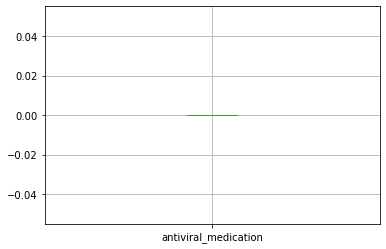

In [93]:
df.boxplot(column=["antiviral_medication"])
plt.show()

In [94]:
lowlotfrontage,upplotfrontage=remove_outlier(df['bought_face_mask'])
df["bought_face_mask"]=np.where(df['bought_face_mask']>upplotfrontage,upplotfrontage,df['bought_face_mask'])
df["bought_face_mask"]=np.where(df['bought_face_mask']<lowlotfrontage,lowlotfrontage,df['bought_face_mask'])











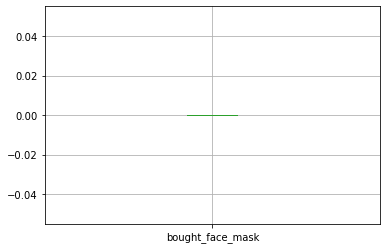

In [95]:
df.boxplot(column=["bought_face_mask"])
plt.show()

In [96]:
lowlotfrontage,upplotfrontage=remove_outlier(df['wash_hands_frequently'])
df["wash_hands_frequently"]=np.where(df['wash_hands_frequently']>upplotfrontage,upplotfrontage,df['wash_hands_frequently'])
df["wash_hands_frequently"]=np.where(df['wash_hands_frequently']<lowlotfrontage,lowlotfrontage,df['wash_hands_frequently'])

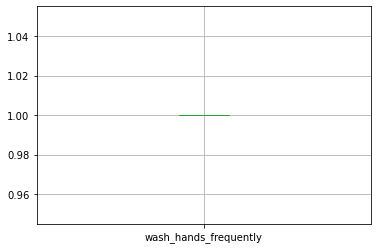

In [97]:
df.boxplot(column=["wash_hands_frequently"])
plt.show()

In [98]:
lowlotfrontage,upplotfrontage=remove_outlier(df['dr_recc_h1n1_vacc'])
df["dr_recc_h1n1_vacc"]=np.where(df['dr_recc_h1n1_vacc']>upplotfrontage,upplotfrontage,df['dr_recc_h1n1_vacc'])
df["dr_recc_h1n1_vacc"]=np.where(df['dr_recc_h1n1_vacc']<lowlotfrontage,lowlotfrontage,df['dr_recc_h1n1_vacc'])

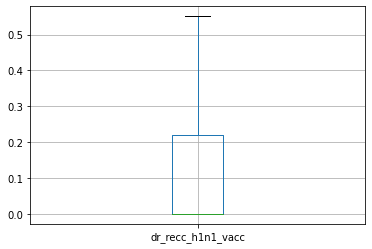

In [99]:
df.boxplot(column=["dr_recc_h1n1_vacc"])
plt.show()

In [100]:
lowlotfrontage,upplotfrontage=remove_outlier(df['cont_child_undr_6_mnths'])
df["cont_child_undr_6_mnths"]=np.where(df['cont_child_undr_6_mnths']>upplotfrontage,upplotfrontage,df['cont_child_undr_6_mnths'])
df["cont_child_undr_6_mnths"]=np.where(df['cont_child_undr_6_mnths']<lowlotfrontage,lowlotfrontage,df['cont_child_undr_6_mnths'])

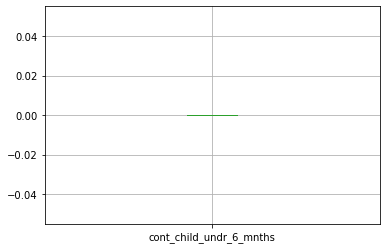

In [101]:
df.boxplot(column=["cont_child_undr_6_mnths"])
plt.show()

In [102]:
lowlotfrontage,upplotfrontage=remove_outlier(df['is_health_worker'])
df["is_health_worker"]=np.where(df['is_health_worker']>upplotfrontage,upplotfrontage,df['is_health_worker'])
df["is_health_worker"]=np.where(df['is_health_worker']<lowlotfrontage,lowlotfrontage,df['is_health_worker'])

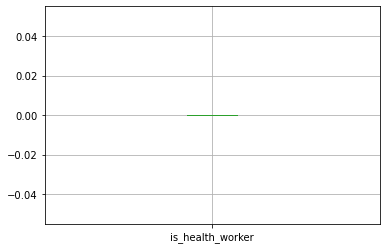

In [103]:
df.boxplot(column=["is_health_worker"])
plt.show()

In [104]:
lowlotfrontage,upplotfrontage=remove_outlier(df['has_health_insur'])
df["has_health_insur"]=np.where(df['has_health_insur']>upplotfrontage,upplotfrontage,df['has_health_insur'])
df["has_health_insur"]=np.where(df['has_health_insur']<lowlotfrontage,lowlotfrontage,df['has_health_insur'])

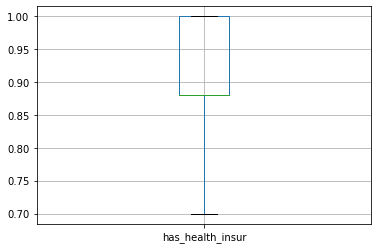

In [105]:
df.boxplot(column=["has_health_insur"])
plt.show()

In [106]:
lowlotfrontage,upplotfrontage=remove_outlier(df['is_seas_vacc_effective'])
df["is_seas_vacc_effective"]=np.where(df['is_seas_vacc_effective']>upplotfrontage,upplotfrontage,df['is_seas_vacc_effective'])
df["is_seas_vacc_effective"]=np.where(df['is_seas_vacc_effective']<lowlotfrontage,lowlotfrontage,df['is_seas_vacc_effective'])

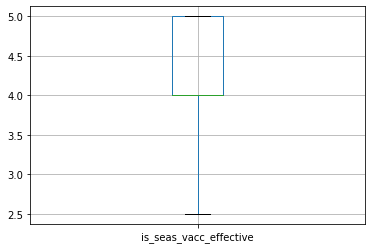

In [107]:
df.boxplot(column=["is_seas_vacc_effective"])
plt.show()

In [108]:
lowlotfrontage,upplotfrontage=remove_outlier(df['sick_from_seas_vacc'])
df["sick_from_seas_vacc"]=np.where(df['sick_from_seas_vacc']>upplotfrontage,upplotfrontage,df['sick_from_seas_vacc'])
df["sick_from_seas_vacc"]=np.where(df['sick_from_seas_vacc']<lowlotfrontage,lowlotfrontage,df['sick_from_seas_vacc'])

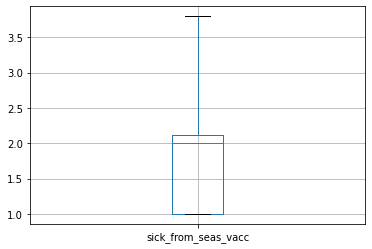

In [109]:
df.boxplot(column=["sick_from_seas_vacc"])
plt.show()

In [110]:
lowlotfrontage,upplotfrontage=remove_outlier(df['no_of_adults'])
df["no_of_adults"]=np.where(df['no_of_adults']>upplotfrontage,upplotfrontage,df['no_of_adults'])
df["no_of_adults"]=np.where(df['no_of_adults']<lowlotfrontage,lowlotfrontage,df['no_of_adults'])

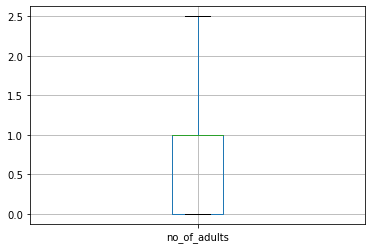

In [111]:
df.boxplot(column=["no_of_adults"])
plt.show()

In [112]:
lowlotfrontage,upplotfrontage=remove_outlier(df['no_of_children'])
df["no_of_children"]=np.where(df['no_of_children']>upplotfrontage,upplotfrontage,df['no_of_children'])
df["no_of_children"]=np.where(df['no_of_children']<lowlotfrontage,lowlotfrontage,df['no_of_children'])

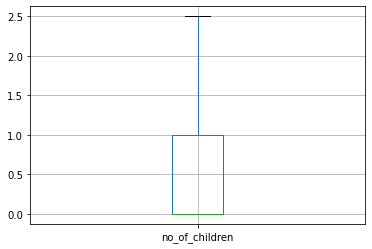

In [113]:
df.boxplot(column=["no_of_children"])
plt.show()

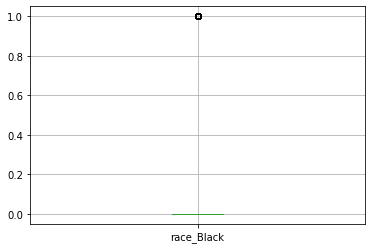

In [114]:
df.boxplot(column=["race_Black"])
plt.show()

In [115]:
lowlotfrontage,upplotfrontage=remove_outlier(df['race_Hispanic'])
df["race_Hispanic"]=np.where(df['race_Hispanic']>upplotfrontage,upplotfrontage,df['race_Hispanic'])
df["race_Hispanic"]=np.where(df['race_Hispanic']<lowlotfrontage,lowlotfrontage,df['race_Hispanic'])

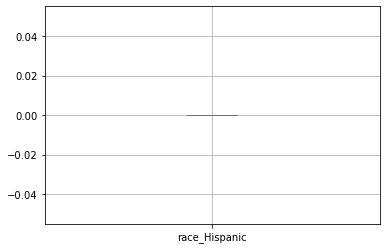

In [116]:
df.boxplot(column=["race_Hispanic"])
plt.show()

In [117]:
lowlotfrontage,upplotfrontage=remove_outlier(df['race_Other or Multiple'])
df["race_Other or Multiple"]=np.where(df['race_Other or Multiple']>upplotfrontage,upplotfrontage,df['race_Other or Multiple'])
df["race_Other or Multiple"]=np.where(df['race_Other or Multiple']<lowlotfrontage,lowlotfrontage,df['race_Other or Multiple'])

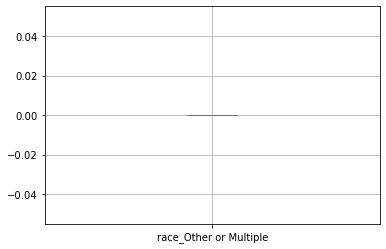

In [118]:
df.boxplot(column=["race_Other or Multiple"])
plt.show()

In [119]:
lowlotfrontage,upplotfrontage=remove_outlier(df['race_White'])
df["race_White"]=np.where(df['race_White']>upplotfrontage,upplotfrontage,df['race_White'])
df["race_White"]=np.where(df['race_White']<lowlotfrontage,lowlotfrontage,df['race_White'])

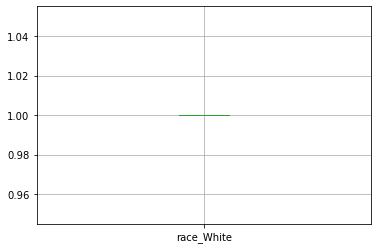

In [120]:
df.boxplot(column=["race_White"])
plt.show()

In [121]:
lowlotfrontage,upplotfrontage=remove_outlier(df['housing_status_Own'])
df["housing_status_Own"]=np.where(df['housing_status_Own']>upplotfrontage,upplotfrontage,df['housing_status_Own'])
df["housing_status_Own"]=np.where(df['housing_status_Own']<lowlotfrontage,lowlotfrontage,df['housing_status_Own'])

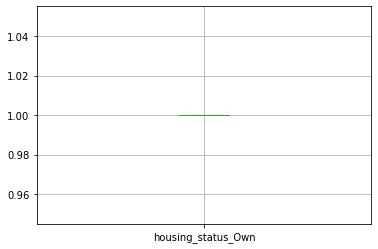

In [122]:
df.boxplot(column=["housing_status_Own"])
plt.show()

In [123]:
lowlotfrontage,upplotfrontage=remove_outlier(df['housing_status_Rent'])
df["housing_status_Rent"]=np.where(df['housing_status_Rent']>upplotfrontage,upplotfrontage,df['housing_status_Rent'])
df["housing_status_Rent"]=np.where(df['housing_status_Rent']<lowlotfrontage,lowlotfrontage,df['housing_status_Rent'])

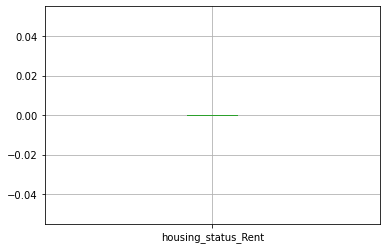

In [124]:
df.boxplot(column=["housing_status_Rent"])
plt.show()

In [125]:
lowlotfrontage,upplotfrontage=remove_outlier(df['employment_Unemployed'])
df["employment_Unemployed"]=np.where(df['employment_Unemployed']>upplotfrontage,upplotfrontage,df['employment_Unemployed'])
df["employment_Unemployed"]=np.where(df['employment_Unemployed']<lowlotfrontage,lowlotfrontage,df['employment_Unemployed'])

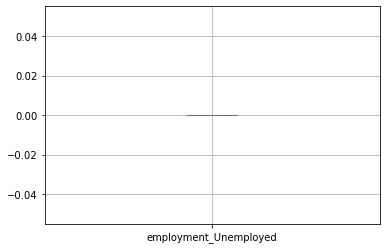

In [126]:
df.boxplot(column=["employment_Unemployed"])
plt.show()

In [127]:
df.isnull().sum()

unique_id                                 0
h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
dr_recc_h1n1_vacc                         0
dr_recc_seasonal_vacc                     0
chronic_medic_condition                   0
cont_child_undr_6_mnths                   0
is_health_worker                          0
has_health_insur                          0
is_h1n1_vacc_effective                    0
is_h1n1_risky                             0
sick_from_h1n1_vacc                       0
is_seas_vacc_effective                    0
is_seas_risky                             0
sick_from_seas_vacc                       0
no_of_adults                    

# logistic regression

In [128]:
x=df.drop(['h1n1_vaccine'],axis=1)
y=df[['h1n1_vaccine']]

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x, y,train_size=0.7,test_size=0.3,random_state=1)

In [130]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\91709\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [131]:
reg.score(x_train,y_train)

0.7899860917941586

In [132]:
reg.score(x_test,y_test)

0.7945838013228503

In [135]:
# firt Creating model with all the features
x = df.drop(['h1n1_vaccine'],axis=1)
y= df['h1n1_vaccine']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [136]:
# Creating Function for viewing Result of the predicted
def res(y_valid):
    cm1 = confusion_matrix(y_test,y_valid)
    ConfusionMatrixDisplay(cm1).plot().ax_.set(ylabel = 'Actual value', xlabel ='Predicted value')
    print('Accuracy',accuracy_score(y_test,y_valid))
    print(classification_report(y_test,y_valid))
    plt.show()

Accuracy 0.8436915013103706
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4220
           1       0.71      0.43      0.54      1122

    accuracy                           0.84      5342
   macro avg       0.79      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342



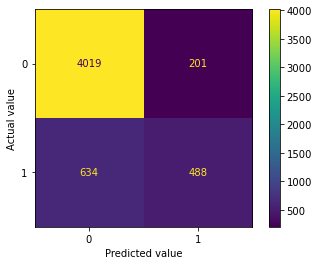

In [137]:
res(y_pred)